# Medical Appointment No Shows

## コンテキスト
人は医師の予約を取り、すべての指示とノーショーを受け取ります。誰のせいですか？これが助けなら、賛成することを忘れないでください:) Greatings！

## 内容
110.527の医療予約は、14の関連する変数（特性）です。最も重要なのは、患者が予定に現れた場合、またはノーショーの場合です。変数名は一目瞭然です。疑問がある場合はお知らせください！奨学金変数は、この概念を意味します= https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia 14変数データ

## 辞書
- 01-PatientId患者の識別
- 02-AppointmentID各予定の識別
- 03-性別男性または女性。女性は男性に比べて大きな割合を占めており、女性はより健康に気を配っています。 
- 04-DataMarcacaoConsulta医師を訪問しなければならない実際の予約の日。 
- 05-DataAgendamento誰かが予定を呼び出しまたは登録した日。これはもちろん予定の前です。 
- 06-年齢患者は何歳ですか。 
- 07-近所予約が行われる場所。 
- 08-奨学金真偽。観察、これは広範なトピックです。この記事を読むことを検討してくださいhttps://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia - 09-高血圧症TrueまたはFalse 
- 10-糖尿病TrueまたはFalse 
- Alcoholism TrueまたはFalse 
- Handcap TrueまたはFalse 
- SMS_received患者に送信される1つ以上のメッセージ。
- ノーショーTrueまたはFalse。

## インスピレーション
予定を非表示にする誰かを予測できる場合はどうなりますか？

## データ分析
必要になるライブラリ呼ぶ

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

from collections import Counter

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# データ読み込み

In [2]:
train_df = pd.read_csv('~/Dropbox/@00_input/Medical_Appointment/KaggleV2-May-2016.csv')

データフレームのカラムを取得

In [3]:
print(train_df.columns.values)
#print(test_df.columns.values)

['PatientId' 'AppointmentID' 'Gender' 'ScheduledDay' 'AppointmentDay'
 'Age' 'Neighbourhood' 'Scholarship' 'Hipertension' 'Diabetes'
 'Alcoholism' 'Handcap' 'SMS_received' 'No-show']


In [4]:
print("train data size", train_df.shape)
#print("train data size", test_df.shape)

train data size (110527, 14)


In [5]:
train_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (train_df.apply(num_missing, axis=0) )#axis=0 defines that function is to be applied on each column

Missing values per column:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


## データ(object)の確認

## Gender
2種類
<br>
性別（F＝女性、M＝男性）



In [8]:
mycounter = Counter(train_df.Gender)
n = 1
for word in mycounter.most_common():
    print(word, n)
    n = n +1

('F', 71840) 1
('M', 38687) 2


In [10]:
## ScheduledDay

In [12]:
"
mycounter = Counter(train_df.ScheduledDay)
n = 1
for word in mycounter.most_common():
    print(word, n)
    n = n +1
    
"

SyntaxError: EOL while scanning string literal (<ipython-input-12-a8a6d1f4e038>, line 1)

## Neighbourhood

In [9]:
mycounter = Counter(train_df.Neighbourhood)
n = 1
for word in mycounter.most_common():
    print(word, n)
    n = n +1

('JARDIM CAMBURI', 7717) 1
('MARIA ORTIZ', 5805) 2
('RESISTÊNCIA', 4431) 3
('JARDIM DA PENHA', 3877) 4
('ITARARÉ', 3514) 5
('CENTRO', 3334) 6
('TABUAZEIRO', 3132) 7
('SANTA MARTHA', 3131) 8
('JESUS DE NAZARETH', 2853) 9
('BONFIM', 2773) 10
('SANTO ANTÔNIO', 2746) 11
('SANTO ANDRÉ', 2571) 12
('CARATOÍRA', 2565) 13
('JABOUR', 2509) 14
('SÃO PEDRO', 2448) 15
('ILHA DO PRÍNCIPE', 2266) 16
('NOVA PALESTINA', 2264) 17
('ANDORINHAS', 2262) 18
('DA PENHA', 2217) 19
('ROMÃO', 2215) 20
('GURIGICA', 2018) 21
('SÃO JOSÉ', 1977) 22
('BELA VISTA', 1907) 23
('MARUÍPE', 1902) 24
('FORTE SÃO JOÃO', 1889) 25
('ILHA DE SANTA MARIA', 1885) 26
('SÃO CRISTÓVÃO', 1836) 27
('REDENÇÃO', 1553) 28
('SÃO BENEDITO', 1439) 29
('JOANA D´ARC', 1427) 30
('CRUZAMENTO', 1398) 31
('CONSOLAÇÃO', 1376) 32
('SANTA TEREZA', 1332) 33
('PRAIA DO SUÁ', 1288) 34
('SANTOS DUMONT', 1276) 35
('GRANDE VITÓRIA', 1071) 36
('ILHA DAS CAIEIRAS', 1071) 37
('INHANGUETÁ', 1057) 38
('PRAIA DO CANTO', 1035) 39
('BENTO FERREIRA', 858) 40
('VI

## No-show 

In [14]:
train_df["No-show"].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [16]:
train_df["Age"].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

Text(0.5, 0, 'Age')

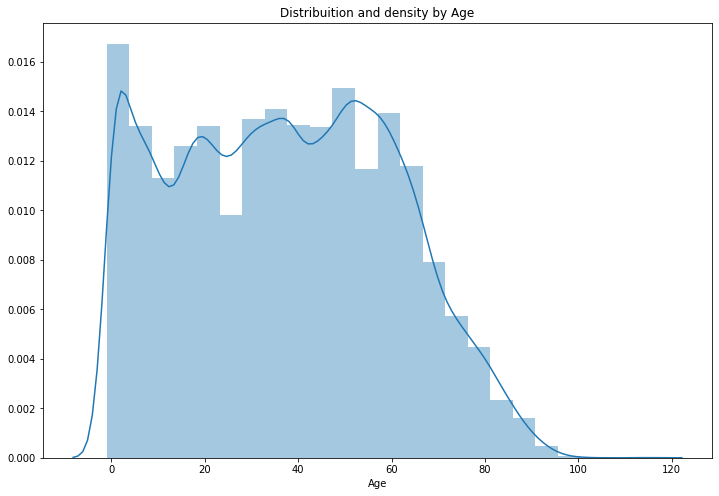

In [17]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

In [18]:
train_df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [21]:
train_df["Alcoholism"].unique()

array([0, 1])

In [22]:
train_df.drop("PatientId", axis = 1, inplace = True)
train_df.drop("AppointmentID", axis = 1, inplace = True)
train_df.drop("ScheduledDay", axis = 1, inplace = True)
train_df.drop("AppointmentDay", axis = 1, inplace = True)
train_df.drop("Neighbourhood", axis = 1, inplace = True)


In [24]:
train_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
Gender          110527 non-null object
Age             110527 non-null int64
Scholarship     110527 non-null int64
Hipertension    110527 non-null int64
Diabetes        110527 non-null int64
Alcoholism      110527 non-null int64
Handcap         110527 non-null int64
SMS_received    110527 non-null int64
No-show         110527 non-null object
dtypes: int64(7), object(2)
memory usage: 7.6+ MB


In [ ]:
Gender_bin = lambder x train_df.Gender 

In [42]:
train_df.Gender.unique()

array(['F', 'M'], dtype=object)

In [33]:
train_df["No-show"] = train_df["No-show"].replace(['Yes', 'No'], [0, 1])

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
Gender          110527 non-null object
Age             110527 non-null int64
Scholarship     110527 non-null int64
Hipertension    110527 non-null int64
Diabetes        110527 non-null int64
Alcoholism      110527 non-null int64
Handcap         110527 non-null int64
SMS_received    110527 non-null int64
No-show         110527 non-null int64
dtypes: int64(8), object(1)
memory usage: 7.6+ MB


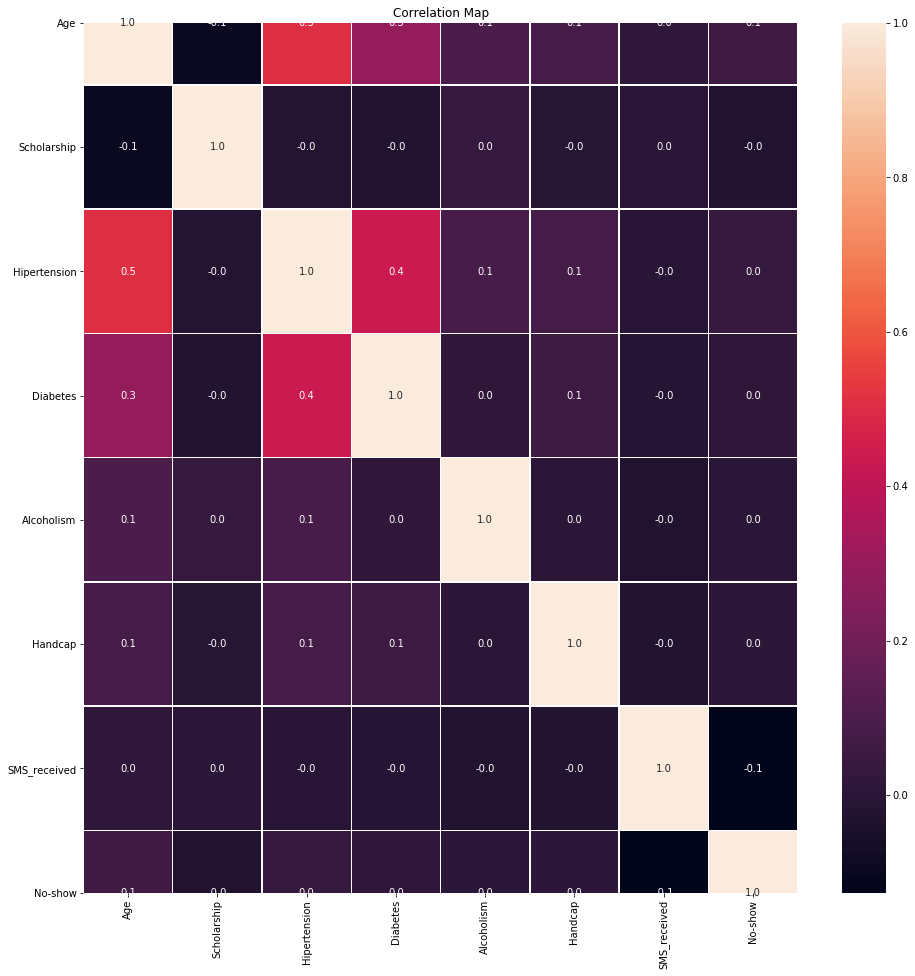

In [36]:
f,ax=plt.subplots(figsize = (16,16))
sns.heatmap(train_df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [37]:
train_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,1
1,M,56,0,0,0,0,0,0,1
2,F,62,0,0,0,0,0,0,1
3,F,8,0,0,0,0,0,0,1
4,F,56,0,1,1,0,0,0,1
